1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [33]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [1]:
import pandas as pd

file_name = "data/data_000637.txt"
N=10000 
#we use a pandas function to read the cvs file
data= pd.read_csv(file_name,nrows=N)
print(data)

      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0        1     0          123  3869200167        2374        26
1        1     0          124  3869200167        2374        27
2        1     0           63  3869200167        2553        28
3        1     0           64  3869200167        2558        19
4        1     0           64  3869200167        2760        25
...    ...   ...          ...         ...         ...       ...
9995     1     0           61  3869200267         696        11
9996     1     0           60  3869200267         701         5
9997     1     0           59  3869200267         707        23
9998     1     0           63  3869200267         706        15
9999     1     0           49  3869200267         777        13

[10000 rows x 6 columns]


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [3]:
x=data["BX_COUNTER"].max()
print("The maximum value of the BX_COUNTER is:", x)

The maximum value of the BX_COUNTER is: 3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [5]:
import datetime

abs_times=[]
for i, row in data.iterrows():
    time= (row["TDC_MEAS"]*25/30+ row["BX_COUNTER"]*25+ row["ORBIT_CNT"]*x*25)
    
    #add the element to the abs_time list
    abs_times.append(time)
    
#create new column in the dataset
data["ABS_TIME"]=abs_times
print("The dataset with the new column is:\n",data)

#new column as a time series with the absolute time in ns 
time_series=pd.to_datetime(data["ABS_TIME"], unit="ns")
print("The time series are:\n", time_series)

The dataset with the new column is:
       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS      ABS_TIME
0        1     0          123  3869200167        2374        26  3.446490e+14
1        1     0          124  3869200167        2374        27  3.446490e+14
2        1     0           63  3869200167        2553        28  3.446490e+14
3        1     0           64  3869200167        2558        19  3.446490e+14
4        1     0           64  3869200167        2760        25  3.446490e+14
...    ...   ...          ...         ...         ...       ...           ...
9995     1     0           61  3869200267         696        11  3.446490e+14
9996     1     0           60  3869200267         701         5  3.446490e+14
9997     1     0           59  3869200267         707        23  3.446490e+14
9998     1     0           63  3869200267         706        15  3.446490e+14
9999     1     0           49  3869200267         777        13  3.446490e+14

[10000 rows x 7 columns]
T

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [6]:
data= pd.read_csv(file_name)
abs_times=[]
for i,row in data.iterrows():
    time= (row["TDC_MEAS"]*25/30+ row["BX_COUNTER"]*25+ row["ORBIT_CNT"]*x*25)
    abs_times.append(time)
    
#duration of the data taking    
data['ABS_TIME'] = pd.to_timedelta(abs_times)

#the duration for the first 10 entries
print("The duration of the data taking is:\n",data.head(10))


The duration of the data taking is:
    HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0     1     0          123  3869200167        2374        26   
1     1     0          124  3869200167        2374        27   
2     1     0           63  3869200167        2553        28   
3     1     0           64  3869200167        2558        19   
4     1     0           64  3869200167        2760        25   
5     1     0           63  3869200167        2762         4   
6     1     0           61  3869200167        2772        14   
7     1     0          139  3869200167        2776         0   
8     1     0           62  3869200167        2774        21   
9     1     0           60  3869200167        2788         7   

                   ABS_TIME  
0 3 days 23:44:09.004934896  
1 3 days 23:44:09.004934897  
2 3 days 23:44:09.004939373  
3 3 days 23:44:09.004939490  
4 3 days 23:44:09.004944545  
5 3 days 23:44:09.004944578  
6 3 days 23:44:09.004944836  
7 3 days 23:44:09.

5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [8]:
count=data.groupby("TDC_CHANNEL").count() 
#The top 3 with the most counts
noisy=count.sort_values(by="HEAD",ascending=False).iloc[:3]
print("The noisy channels are:\n", noisy)

The noisy channels are:
                HEAD    FPGA  ORBIT_CNT  BX_COUNTER  TDC_MEAS  ABS_TIME
TDC_CHANNEL                                                           
139          108059  108059     108059      108059    108059    108059
64            66020   66020      66020       66020     66020     66020
63            64642   64642      64642       64642     64642     64642


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [9]:
print("The non empty orbits are:\n",len(data.groupby("ORBIT_CNT").count()))


The non empty orbits are:
 11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [10]:
data[data['TDC_CHANNEL']==139].ORBIT_CNT.nunique()

10976

8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [13]:
fpga_0 = pd.Series(data[data['FPGA']==0]['TDC_CHANNEL'].value_counts())
#select the  FPGA with number 1
fpga_1 = pd.Series(data[data['FPGA']==1]['TDC_CHANNEL'].value_counts()) 
print("The FPGA identified with 0:\n", fpga_0)
print("==========================")
print("The FPGA identified with 1:\n", fpga_1)

The FPGA identified with 0:
 139    75617
64     64581
63     63724
61     48699
62     48275
       ...  
130       33
137       32
30         4
129        2
39         1
Name: TDC_CHANNEL, Length: 124, dtype: int64
The FPGA identified with 1:
 2      32669
139    32442
1      28438
4      26403
3      21970
       ...  
9         80
130       38
138       36
137       36
129       35
Name: TDC_CHANNEL, Length: 132, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0, 0.5, 'Count')

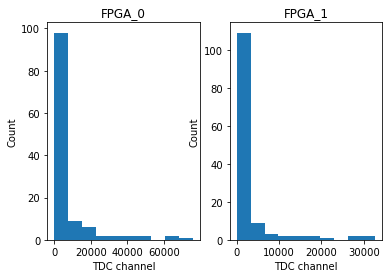

In [14]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ) = plt.subplots(1, 2,)

ax1.hist(fpga_0)
ax1.set_title('FPGA_0')
ax1.set_xlabel('TDC channel')
ax1.set_ylabel('Count')

ax2.hist(fpga_1)
ax2.set_title('FPGA_1')
ax2.set_xlabel('TDC channel')
ax2.set_ylabel('Count')